In [221]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

class Robot():
    def __init__(self, init_p, velo):
        self.p = init_p
        self.v = velo

    def __repr__(self):
        return f'(p={self.p}, v={self.v})'
    
class Floor():
    def __init__(self, width, height):
        self.width = width
        self.height = height

        self.tree_to_find = np.zeros((3, 5))
        # set 1s in the shape of a tree
        self.tree_to_find[:1, 2:3] = 1
        self.tree_to_find[1:2, 1:4] = 1
        self.tree_to_find[2:3, 0:5] = 1

    def place(self, robots):
        self.floor = np.zeros((self.height, self.width))
        for r in robots:
            self.floor[r.p[1], r.p[0]] += 1

    def draw(self, robots):
        self.place(robots)
        print(self.floor)
        print()

    def tick(self, robots):
        for r in robots:
            # use modulo to wrap around
            r.p = ((r.p[0] + r.v[0]) % self.width, (r.p[1] + r.v[1]) % self.height)

        self.place(robots)

    def __repr__(self):
        return f'{self.floor}'
    
    def is_christmas_tree(self):
        # most (i.e. >50%) of the robots arrange themselves into a christmas tree
        # we have to do a "tree" search
        v = sliding_window_view(self.floor, self.tree_to_find.shape)
        if np.any(np.all(v == self.tree_to_find, axis=(2, 3))):
            return True
        return False

In [222]:
robots = []

with open("input.txt") as f:
    for line in f:
        p, v = line.strip().split(" ")
        p = p.split("=")[1]
        p = (int(p.split(",")[0]), int(p.split(",")[1]))
        v = v.split("=")[1]
        v = (int(v.split(",")[0]), int(v.split(",")[1]))
        robots.append(Robot(p, v))

print(f"{len(robots)} robots")

floor = Floor(101, 103)

for i in range(100):
    floor.tick(robots)

q1 = floor.floor[0:floor.height//2, 0:floor.width//2]
q2 = floor.floor[0:floor.height//2, 1+floor.width//2:]
q3 = floor.floor[1+floor.height//2:floor.height, 0:floor.width//2]
q4 = floor.floor[1+floor.height//2:floor.height, 1+floor.width//2:]

print(np.prod([q1.sum(), q2.sum(), q3.sum(), q4.sum()], dtype=np.int64))

500 robots
230436441


Found christmas tree at 8270


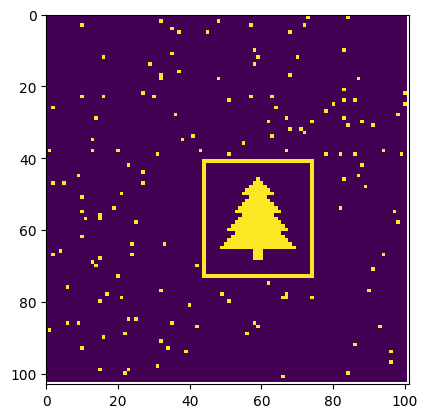

In [223]:
robots = []
with open("input.txt") as f:
    for line in f:
        p, v = line.strip().split(" ")
        p = p.split("=")[1]
        p = (int(p.split(",")[0]), int(p.split(",")[1]))
        v = v.split("=")[1]
        v = (int(v.split(",")[0]), int(v.split(",")[1]))
        robots.append(Robot(p, v))

floor = Floor(101, 103)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(0, 101)
ax.set_ylim(0, 103)
plt.gca().invert_yaxis() # to make the y axis from bottom to top like in the problem

scrub = 10**4

for i in range(1, 10**4):
    floor.tick(robots)
    if floor.is_christmas_tree():
        print(f"Found christmas tree at {i}")
        christmas_frame = i
        ax.imshow(floor.floor)
        break

MovieWriter imagemagick unavailable; using Pillow instead.


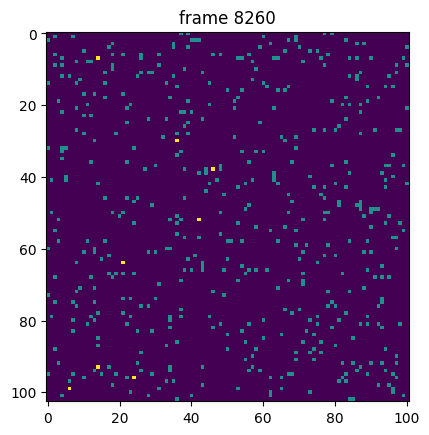

In [228]:
# let's animate the robots moving into the christmas tree
from matplotlib.animation import FuncAnimation

robots = []
with open("input.txt") as f:
    for line in f:
        p, v = line.strip().split(" ")
        p = p.split("=")[1]
        p = (int(p.split(",")[0]), int(p.split(",")[1]))
        v = v.split("=")[1]
        v = (int(v.split(",")[0]), int(v.split(",")[1]))
        robots.append(Robot(p, v))

floor = Floor(101, 103)

fig, ax = plt.subplots()
ax.set_xlim(0, 101)
ax.set_ylim(0, 103)

for _ in range(1, christmas_frame-10):
    floor.tick(robots)

def update(frame):
    ax.clear()
    ax.imshow(floor.floor)
    plt.title(f"frame {frame+christmas_frame-10}")
    floor.tick(robots)

ani = FuncAnimation(fig, update, frames=20, repeat=False, interval=400)
ani.save("tree_search.gif", writer="imagemagick")